### **Importamos las librerías necesarias.**

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
diccionario = pd.read_csv('diccionario.csv')
tam_loc = pd.read_csv('tam_loc.csv')
censo = pd.read_csv('censo_datos.csv')

In [6]:
censo.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,21,Puebla,0,Total de la entidad Puebla,0,Total de la Entidad,NaN,NaN,NaN,6583278,...,1444126,691363,539920,213909,129993,102541,207818,939937,49800,*
1,21,Puebla,0,Total de la entidad Puebla,9998,Localidades de una vivienda,NaN,NaN,NaN,3437,...,595,144,181,22,15,236,223,659,140,*
2,21,Puebla,0,Total de la entidad Puebla,9999,Localidades de dos viviendas,NaN,NaN,NaN,2667,...,492,97,137,13,7,191,218,598,126,*
3,21,Puebla,1,Acajete,0,Total del Municipio,NaN,NaN,NaN,72894,...,12885,3430,3017,384,277,851,1899,11183,387,*
4,21,Puebla,1,Acajete,1,Acajete,"97°57'09.774"" W","19°06'17.785"" N",2439.0,13922,...,2603,1007,1158,121,71,133,330,1860,57,7


In [7]:
diccionario.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,CENSO DE POBLACIÓN Y VIVIENDA 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Relación de indicadores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Cuarta edición,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Núm.,Indicador,Descripción,Mnemónico,Rangos,Longitud,NaN,NaN,NaN,NaN
4,1,Clave de entidad federativa,Código que identifica a la entidad federativa....,ENTIDAD,00…32,2,NaN,NaN,NaN,NaN
5,2,Entidad federativa,Nombre oficial de la entidad federativa.,NOM_ENT,Alfanumérico,50,NaN,NaN,NaN,NaN
6,3,Clave de municipio o demarcación territorial,Código que identifica al municipio o demarcaci...,MUN,000…570,3,NaN,NaN,NaN,
7,4,Municipio o demarcación territorial,Nombre oficial del municipio o demarcación ter...,NOM_MUN,Alfanumérico,50,NaN,NaN,NaN,NaN
8,5,Clave de localidad,Código que identifica a la localidad al interi...,LOC,0000…9999,4,NaN,NaN,NaN,NaN
9,6,Localidad,Nombre con el que se reconoce a la localidad d...,NOM_LOC,Alfanumérico,70,NaN,NaN,NaN,NaN


Modificamos el dataframe diccionario para tener sólo columnas de importancia.

In [21]:
processed_diccionario = pd.concat([diccionario['Unnamed: 1'], diccionario['Unnamed: 2'], diccionario['Unnamed: 3']], axis = 1)
processed_diccionario = processed_diccionario.dropna(axis = 0)
processed_diccionario = processed_diccionario.rename(columns = {'Unnamed: 1' : 'Indicador', 'Unnamed: 2': 'Descripción', 'Unnamed: 3': 'Mnemónico'})
processed_diccionario = processed_diccionario.drop(index = 3)
processed_diccionario

,Indicador,Descripción,Mnemónico
4,Clave de entidad federativa,Código que identifica a la entidad federativa....,ENTIDAD
5,Entidad federativa,Nombre oficial de la entidad federativa.,NOM_ENT
6,Clave de municipio o demarcación territorial,Código que identifica al municipio o demarcaci...,MUN
7,Municipio o demarcación territorial,Nombre oficial del municipio o demarcación ter...,NOM_MUN
8,Clave de localidad,Código que identifica a la localidad al interi...,LOC
...,...,...,...
285,Viviendas particulares habitadas sin radio ni ...,Viviendas particulares habitadas que no cuenta...,VPH_SINRTV
286,Viviendas particulares habitadas sin línea tel...,Viviendas particulares habitadas que no cuenta...,VPH_SINLTC
287,Viviendas particulares habitadas sin computado...,Viviendas particulares habitadas que no cuenta...,VPH_SINCINT
288,Viviendas particulares habitadas sin tecnologí...,Viviendas particulares habitadas que no cuenta...,VPH_SINTIC


In [9]:
tam_loc.head()

,tam_loc,descripcion
0,1,1 a 249 habitantes
1,2,250 a 499 habitantes
2,3,500 a 999 habitantes
3,4,1 000 a 2 499 habitantes
4,5,2 500 a 4 999 habitantes


In [10]:
censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7059 entries, 0 to 7058
Columns: 286 entries, ENTIDAD to TAMLOC
dtypes: float64(1), int64(6), object(279)
memory usage: 15.4+ MB


In [11]:
censo.shape

(7059, 286)

### **Valores nulos**

Número de columnas

In [25]:
censo.isna().any().sum()

5

Total de valores nulos

In [28]:
censo.isnull().sum().sum()

1481

Relación de columnas y valores nulos

In [30]:
censo.isnull().sum()[censo.isnull().sum()>0]

LONGITUD    491
LATITUD     491
ALTITUD     491
REL_H_M       4
PROM_HNV      4
dtype: int64

Búsqueda de significado de los mnemónicos

In [15]:
relStr = processed_diccionario.loc[processed_diccionario['Mnemónico'] == 'REL_H_M']['Indicador'].values[0]
promStr = processed_diccionario.loc[processed_diccionario['Mnemónico'] == 'PROM_HNV']['Indicador'].values[0]
relStr, promStr

('Relación hombres-mujeres', 'Promedio de hijas e hijos nacidos vivos')

Renombrar nombres de filas y cambiar sus nombres 

In [16]:
censo.isnull().sum()[censo.isnull().sum()>0].rename({'REL_H_M': relStr.upper(), 'PROM_HNV': promStr.upper()}, axis = 'index')

LONGITUD                                   491
LATITUD                                    491
ALTITUD                                    491
RELACIÓN HOMBRES-MUJERES                     4
PROMEDIO DE HIJAS E HIJOS NACIDOS VIVOS      4
dtype: int64

Mapa de calor de la distribución de valores nulos.

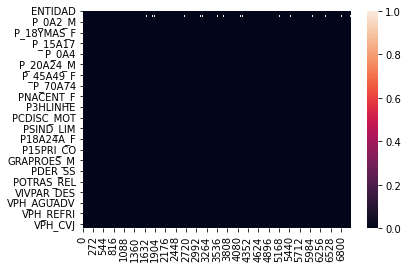

In [17]:
censo.isnull().transpose().pipe(
    lambda df : sns.heatmap(data = df)
)